In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import mglearn

### 2.3.1 예제에 사용할 데이터셋

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


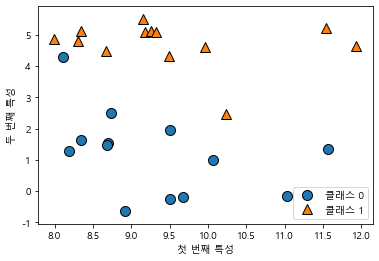

In [2]:
# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 마이너스 부호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 산점도 작성
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타겟')

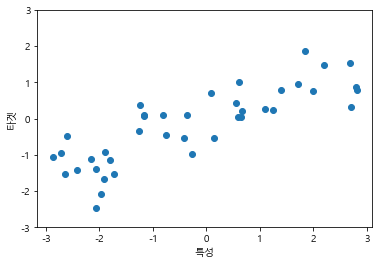

In [3]:
# wave 데이터셋 생성
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타겟")

In [4]:
# 유방암 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# 유방암 데이터셋의 형태
print("유방암 데이터셋의 형태:" ,cancer.data.shape)

유방암 데이터셋의 형태: (569, 30)


In [6]:
# 클래스별 샘플 개수 확인
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
# 특성 의미 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


---
---
### 2.3.2 k-최근접 이웃

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


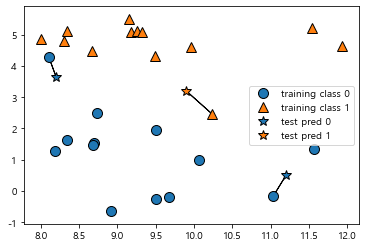

In [8]:
# 가장 간단한 k-NN으로 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용
# forge 데이터셋을 1-NN 으로 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


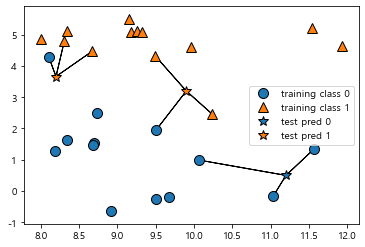

In [9]:
# forge 데이터셋을 3-NN 으로 분류
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
# KNeighborsClassifier 임포트 후 객체 생성하고 이웃 수 매개변수 지정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
# 훈련 세트로 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# 테스트 데이터에 대해 predict 메서드 호출로 예측
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [14]:
# 모델 평가
print("테스트 세트 정확도: {:.2f}" .format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


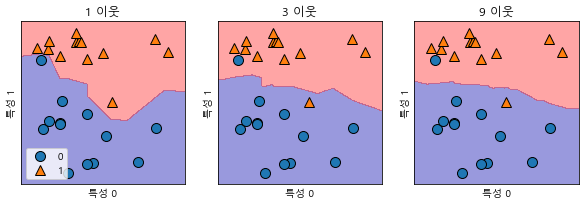

In [15]:
# xy 평면에 그려서 결정경계(decision boundary) 분석
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)  

# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아짐

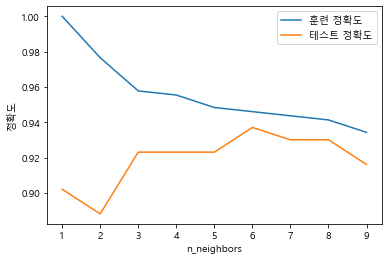

In [16]:
# 유방암 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neightbors 적용
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

# 이웃 수에 따른 훈련 세트와 데스트 세트 정확도 비교   
# 정확도가 가장 좋을 때는 중간 정도의 6개

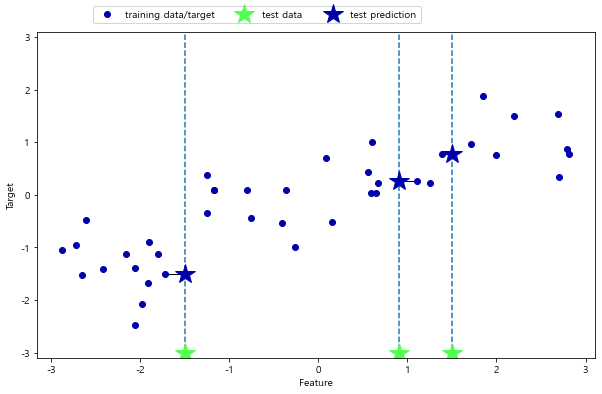

In [17]:
# wave 데이터셋 1-NN 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

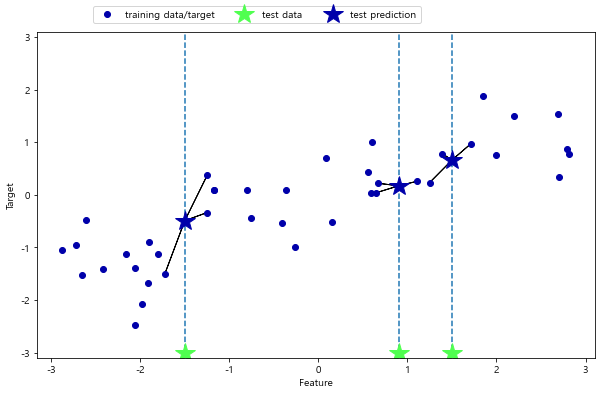

In [18]:
 # wave 데이터셋 3-NN 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
# 회귀를 위한 k-NN 알고리즘
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
# 결정계수 R^2 값 확인
print("테스트 세트 R^2: {:.2f}" .format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


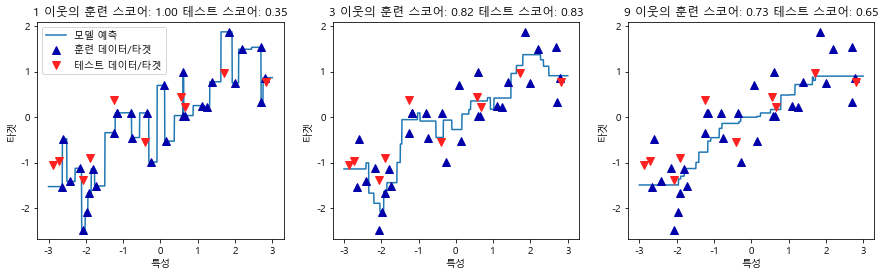

In [22]:
# KNeighborsRegressor 분석
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}" .format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")
axes[0].legend(["모델 예측", "훈련 데이터/타겟", "테스트 데이터/타겟"], loc="best")  

In [23]:
'''
1이웃일 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가서 불안정한 예측을 만들어 냄   
이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정적인 예측을 얻을 수 있음

k-NN에서 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수   
실제로 이웃의 수는 3,5개 정도로 적을 때 잘 작동하지만 잘 조정해야 한다.   
   
k-NN의 장점은 이해하기 쉬운 모델이고 많이 조정하지 않아도 괜찮은 성능으로 더 복잡한 알고리즘 적용전에 시도해볼만한 시작점이다.   
모델은 빠르게 만들 수 있지만 훈련세트가 너무 크면 예측이 느려진다.   
k-NN 알고리즘을 사용할 땐 데이터 전처리 과정이 중요하다.   
수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않고 특성 값 데부분이 0인 데이터셋과는 특히 잘 작동하지 않는다.   
'''

'\n1이웃일 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가서 불안정한 예측을 만들어 냄   \n이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정적인 예측을 얻을 수 있음\n\nk-NN에서 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수   \n실제로 이웃의 수는 3,5개 정도로 적을 때 잘 작동하지만 잘 조정해야 한다.   \n   \nk-NN의 장점은 이해하기 쉬운 모델이고 많이 조정하지 않아도 괜찮은 성능으로 더 복잡한 알고리즘 적용전에 시도해볼만한 시작점이다.   \n모델은 빠르게 만들 수 있지만 훈련세트가 너무 크면 예측이 느려진다.   \nk-NN 알고리즘을 사용할 땐 데이터 전처리 과정이 중요하다.   \n수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않고 특성 값 데부분이 0인 데이터셋과는 특히 잘 작동하지 않는다.   \n'

---
---
### 2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


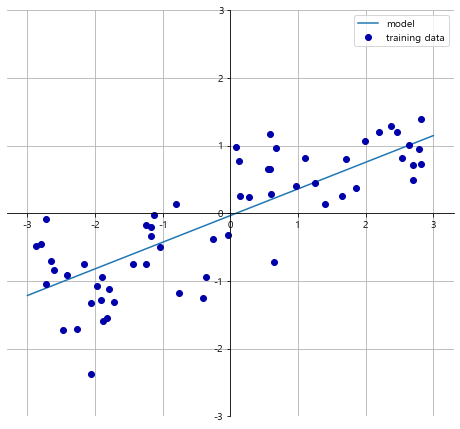

In [24]:
mglearn.plots.plot_linear_regression_wave()

##### 선형 회귀 (최소제곱법)

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [26]:
# 기울기 파라미터(w)는 가중치 또는 계수라고 하며 lr.coef_
# 편향, 절편 파라미터(b)는 lr.intercept_
print("lr.coef_", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_ [0.39390555]
lr.intercept_: -0.031804343026759746


In [27]:
print("훈련 세트 점수: {:.2f}" .format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lr.score(X_test, y_test)))
# 훈련세트, 테스트세트의 점수가 비슷함 -> 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [28]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("훈련 세트 점수: {:.2f}" .format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lr.score(X_test, y_test)))
# 훈련 데이터와 테스트 데이터 사이의 큰 성능 차이 -> 모델이 과대적합되어 있으므로 복잡도를 제어할 수 있는 모델 필요

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


##### Ridge

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(ridge.score(X_test, y_test)))
# 기본 alpha = 1.0, alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 된다

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [31]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [32]:
# alpha = 0.1, 극도로 작은 alpha 값은 계수를 거의 제한하지 않음
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


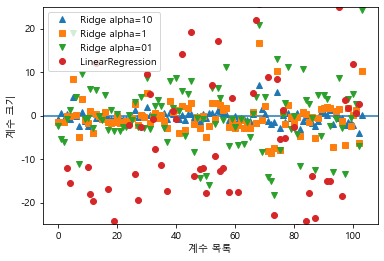

In [33]:
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=01")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

# alpha가 작아질수록 선형 회귀의 계수는 값이 커져 그림 밖으로 넘어간다

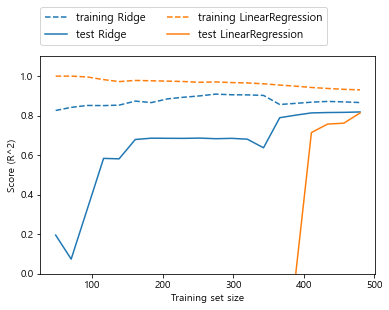

In [34]:
mglearn.plots.plot_ridge_n_samples()

In [35]:
'''
릿지, 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.
리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터보다 낮지만 테스트 데이터에서는 리지의 점수가 더 높다.
데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지와 선형 회귀의 성능이 같아진다.
선형 회귀의 훈련 데이터 성능이 데이터가 많아질수록 감소하는데, 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.
'''

'\n릿지, 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.\n리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터보다 낮지만 테스트 데이터에서는 리지의 점수가 더 높다.\n데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지와 선형 회귀의 성능이 같아진다.\n선형 회귀의 훈련 데이터 성능이 데이터가 많아질수록 감소하는데, 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.\n'

##### Lasso

In [36]:
'''
라쏘는 L1규제로 일부 계수를 0으로 만든다. 즉 모델에서 완전히 제외되는 특성이 생긴다.
모델을 이해하기 쉬워지고 가장 중요한 특성이 무엇인지 드러내준다.
'''

'\n라쏘는 L1규제로 일부 계수를 0으로 만든다. 즉 모델에서 완전히 제외되는 특성이 생긴다.\n모델을 이해하기 쉬워지고 가장 중요한 특성이 무엇인지 드러내준다.\n'

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

#  104개의 특성 중 4개만 사용해서 훈련, 테스트 세트 모두 결과가 나쁘다.

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [38]:
# 과소적합을 줄이기 위해 alpha값을 줄여서 모델 작성
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

# alpha 값을 낮춰서 모델의 복잡도를 증가시켜 성능이 좋아졌다.
# 성능도 릿지보다 조금 좋은데 사용된 특성도 33개로 모델을 분석하기도 조금 더 쉽다.

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [39]:
# alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되어 선형회귀와 결과가 비슷해진다.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


(-25.0, 25.0)

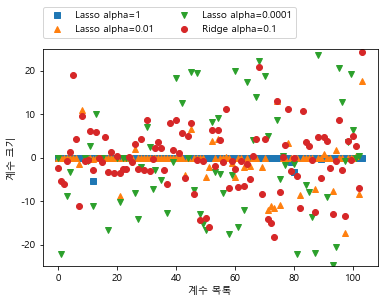

In [40]:
plt.plot(lasso.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.xlim(xlims)
plt.ylim(-25,25)


In [41]:
'''
alpha=1일 때 대부분의 변수가 0이고 나머지 계수들도 크기가 작다.
alpha=0.01일 때도 많은 변수가 0이고 alpha=0.001일 때 계수 대부분이 0이 아니다.
라쏘와 릿지를 결합한 Elastic Net도 있다.
'''

'\nalpha=1일 때 대부분의 변수가 0이고 나머지 계수들도 크기가 작다.\nalpha=0.01일 때도 많은 변수가 0이고 alpha=0.001일 때 계수 대부분이 0이 아니다.\n라쏘와 릿지를 결합한 Elastic Net도 있다.\n'

##### 분류용 선형 모델

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


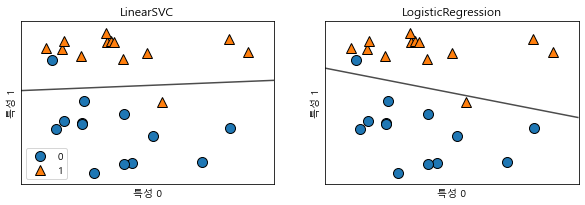

In [42]:
# Logistic Regression, Linear SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False,eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [43]:
'''
규제의 강도를 결정하는 매개변수는 C
C의 값이 높아지면 규제가 감소한다. -> 높은 C값을 설정하면 훈련세트에 가능한 최대로 맞추려 하고 C값을 낮추면 계수 벡터(w)가 0에 가까워지게 한다.
C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하고, C의 값이 높아지면 개개의 데이터 포인트를 정확히 분류하려고 한다.
'''

'\n규제의 강도를 결정하는 매개변수는 C\nC의 값이 높아지면 규제가 감소한다. -> 높은 C값을 설정하면 훈련세트에 가능한 최대로 맞추려 하고 C값을 낮추면 계수 벡터(w)가 0에 가까워지게 한다.\nC의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하고, C의 값이 높아지면 개개의 데이터 포인트를 정확히 분류하려고 한다.\n'

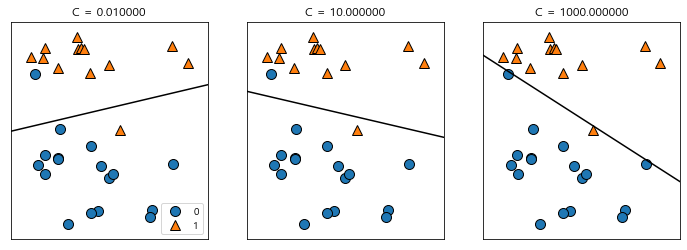

In [44]:
mglearn.plots.plot_linear_svc_regularization()

In [45]:
# 유방암 데이터셋으로 Logisitic Regression 분석
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) 
print("훈련 세트 점수: {:.3f}" .format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}" .format(logreg.score(X_test, y_test)))

# 훈련 세트와 테스트 세트가 매우 비슷해서 과소적합 의심

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [46]:
# 모델의 제약을 더 풀어주기 위해 C 값 증가
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train) 
print("훈련 세트 점수: {:.3f}" .format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}" .format(logreg100.score(X_test, y_test)))

# C 값을 증가시키니 훈련세트, 테스트세트의 정확도 둘다 조금 증가한다.

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [47]:
# C값을 작게해서 규제
logreg001 = LogisticRegression(C=0.01, max_iter=3000).fit(X_train, y_train) 
print("훈련 세트 점수: {:.3f}" .format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}" .format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


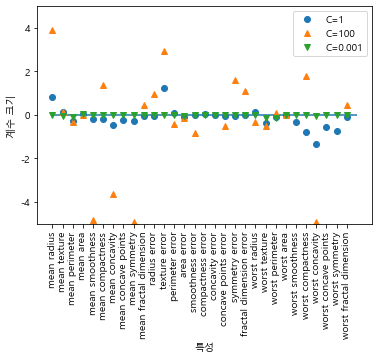

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


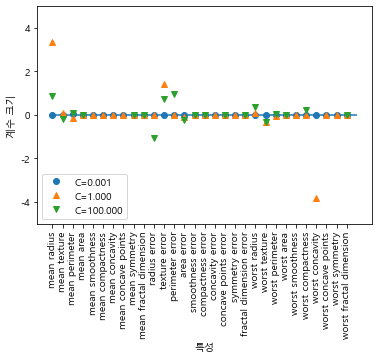

In [49]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### 다중 클래스 분류용 선형 모델

In [ ]:
'''
이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법이다.
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키고 결국 클래스의 수만큼 이진 분류 모델이 만들어진다.
예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.
'''

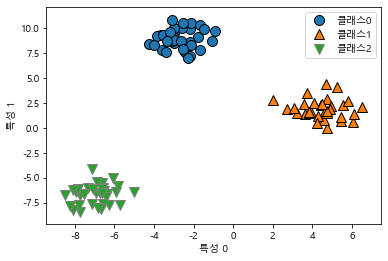

In [50]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스1", "클래스2"])


In [51]:
# 이 데이터셋으로 LinearSVC 분류기를 훈련
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


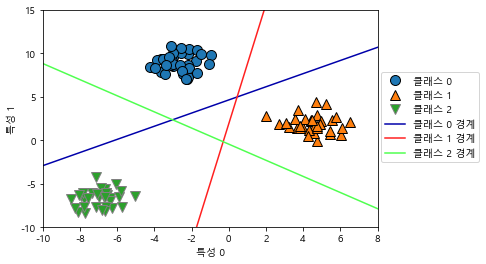

In [59]:
# 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01,0.3))


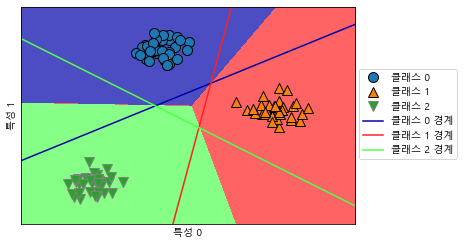

In [62]:
# 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01,0.3))


##### 장단점과 매개변수

In [ ]:
'''
선형 모델의 주요 매개변수는 회귀모델에서는 alpha, 분류 모델에서는 C
alpha 값이 클수록, C 값이 작을수록 모델이 단순해진다. 이 매개변수를 조정하느 것이 중요하다.
보통 C와 alpha는 로그스케일(0.01, 0.1, 1, 10.. 10배씩)로 최적치를 정하고 L1 규제를 사용할지 L2 규제를 사용할지 정한다.
모델의 해석이 중요하거나 중요한 특성이 많지 않다고 생각되면 L1 규제, 그렇지 않다면 기본적으로 L2 규제를 사용한다.

선형 모델은 학습 속도가 빠르고 예측도 빠르다. 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본설정보다 빠르게 처리하도록
LogisticRegression과 Ridge에 solver='sag' 옵션을 해준다. (확률적 경사 하강법) 또는 SGDClassifier와 SGDRegressor도 사용할 수 있다.

선형 모델의 다른 장범은 회귀와 분류의 공식을 통해 예측이 어떻게 만들어지는 비교적 쉽게 이해할 수 있다.
하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있는데 데이터셋의 특성들이 서로 깊에 연관되어 있을 때 그렇다.

선형 모델은 샘플에 비해 특성이 많을 때 잘 작동한다. 하지만 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다.

'''